In [ ]:
# https://api.census.gov/data.html
# https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf

In [6]:
os.chdir(r"C:\Users\Ahicks88\Documents\Analytics\GitHub\ContinuedLearning\DataCamp\Python\Python Programming\Analyzing US Census Data in Python\Datasets")
import pandas as pd
states = pd.read_csv(r"states.csv")

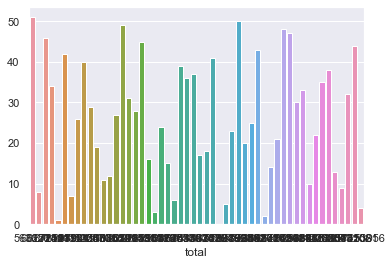

In [9]:
# Census Subject Tables:

states.head()

import seaborn as sns
sns.set()
sns.barplot(
    x = "total",
    y = states.index,
    data = states
)

In [12]:
# Aggregate and Calculate Proportions:

# What percentage of Hispanics identify as White?
print(100 * states["hispanic_white"].sum() / states["hispanic"].sum())

# Set list of Hispanic race column names
hispanic_races = [
    "hispanic_white", 
    "hispanic_black", "hispanic_aian", 
    "hispanic_asian", "hispanic_pacific", 
    "hispanic_other", "hispanic_multiracial"
    ]

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

54.5246839030109
hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64


In [13]:
# Calculate Proportions:

# What percentage of Hispanics identify as each race?
print(100 * states[hispanic_races].sum() / states["hispanic"].sum())

# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states_hr[race]  / states["hispanic"]

# View the result
print(states_hr.head())


hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64
   hispanic_white  hispanic_black  hispanic_aian  hispanic_asian  \
0       38.249588        3.703624       1.245137        0.354522   
1       46.513287        3.347856       5.898239        1.722337   
2       51.261088        1.050419       2.063321        0.326412   
3       38.570277        1.501209       1.109917        0.244558   
4       46.366571        0.965254       1.431105        0.613235   

   hispanic_pacific  hispanic_other  hispanic_multiracial  
0          0.582429       50.042564              5.822136  
1          0.484089       25.455426             16.578766  
2          0.089122       39.739408              5.470230  
3          0.190271       52.378393              6.005375  
4          0.112811       44.469173   

In [ ]:
# Identify Extreme Values:

# Import seaborn and matplotlib.plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Create a boxplot
sns.boxplot(data = states_hr, orient = "h")
plt.show()

# Show states with extreme values in various columns
print(states_hr.nlargest(1, "hispanic_white").squeeze())
print(states_hr.nsmallest(1, "hispanic_other").squeeze())
print(states_hr.nlargest(1, "hispanic_asian").squeeze())

In [10]:
# Using the Census API:

import requests

HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST,year,dataset])
predicates = {}
get_vars = ["NAME","AREALAND","P001001"]
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"
r = requests.get(base_url, params=predicates)

print(r.text)
print(r.json()[0])

col_names = ["name", "area_m2", "total_pop", "state"]

import pandas as pd

df = pd.DataFrame(columns = col_names, data = r.json()[1:])
# Fix data types
df["area_m2"] = df["area_m2"].astype(int)
df["total_pop"] = df["total_pop"].astype(int)
print(df.head)

# Create new column
df["pop_per_km2"] = 1000**2 * df["total_pop"]/ / df["area_m2"]
# Find top 3
df.nlargest(3, "pop_per_km2")

error: error: unknown variable 'AREALAND'


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [124]:
# The Basic API Request:

# Build base URL
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ["NAME","P013001","P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

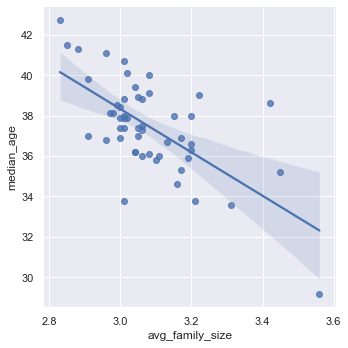

In [16]:
# The API Response and Pandas:

# Import seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

# Construct the data frame
col_names = ["name","median_age","avg_family_size","state"]
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

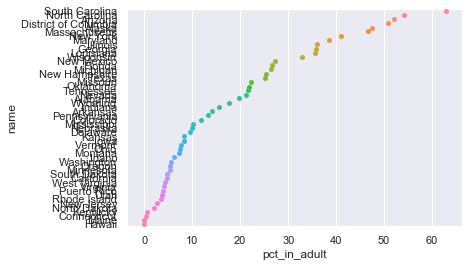

In [17]:
# API to Visualization: Group Quarters:

# Specify variables and execute API request
get_vars = ["NAME", "PCT021005","PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states["in_adult"] / (states["in_adult"] + states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

In [ ]:
# Census Geographies:


In [9]:
import requests
import json
import pandas as pd 

# The Basic API Request:

# Build base URL
HOST = "https://api.census.gov/data"
year = "2019"
dataset = "pep/population"
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ["CBSA","POP"]
predicates = {} 
predicates["get"] = ",".join(get_vars) # List of varibles
predicates["for"] = "state:*" # Geography

# Execute the request, examine text of response object
data = requests.get(base_url, params=predicates)
data = pd.DataFrame(json.loads(data.text)[1:], columns=["CBSA","POP","state"])
data

,CBSA,POP,state
0,None,2976149,28
1,None,6137428,29
2,None,1068778,30
3,None,1934408,31
4,None,3080156,32
5,None,1359711,33
6,None,8882190,34
7,None,2096829,35
8,None,19453561,36
9,None,10488084,37


In [129]:
base_url

'https://api.census.gov/data/1990/pep/int_charagegroups'

In [ ]:
api.census.gov/data//1990/pep/int_charagegroups
api.census.gov/data/1990/pep/int_charagegroups

In [17]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
seriesId = series['seriesID']
for item in series['data']:
    year = item['year']
period = item['period']
value = item['value']
footnotes=""
for footnote in item['footnotes']:
    if footnote:
       footnotes = footnotes + footnote['text'] + ','
    'if 'M01' <= period <= 'M12':'
x.add_row([seriesId,year,period,value,footnotes[0:-1]])
output = open(seriesId + '.txt','w')
output.write (x.get_string())
output.close()

SyntaxError: invalid syntax (<ipython-input-17-eb20e2d02853>, line 19)